In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import math
import statistics
import warnings
import numpy as  np
import ast
warnings.filterwarnings('ignore')
data_files = glob.glob(r'../Squircle experiment/data/*.json')
# Load the dataset
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_json(data_files[i])
    temp_df['previous_response'] = temp_df['choice'].shift(fill_value=None)
    df = pd.concat([df, temp_df])
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
# select only the main task
df = df[(df['block_number'] != 'Training')]

# extracting sample size
n = len(set(df.pt_num))

df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

In [ ]:

def resample_traj(data,rate):
    for i in len(data):
        c_traj = data['traj_record'][i]
        c_df = pd.DataFrame(c_traj, columns=['x', 'y'])
        c_df['timestamp'][i] = data['traj_timestamp'][i]
        c_df['timestamp'] = pd.to_datetime(c_df['timestamp'], unit='s')
        c_df.set_index('timestamp', inplace=True)
        downsampling_interval = rate
        down_df = c_df.resample(downsampling_interval).mean().dropna()
        down_df['downsampled_coordinates'][i] = (down_df['x'][i], downs_df['y'][i]))
        
        
    
    
# Your original data with timestamps
# data = [(0, -450, timestamp1), (1, -440, timestamp2), ... , (806, 410, timestampN)]


# Convert the data to a pandas DataFrame


# Convert the 'timestamp' column to datetime type
  # Assuming timestamps are in seconds

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Define the downsampling time interval (e.g., 5 milliseconds)


# Resample using asfreq to keep the original values at the specified interval
#downsampled_df = df.asfreq(downsampling_interval, method='pad')
downsampled_df = df.resample(downsampling_interval).mean().dropna()
# Create a new column with tuples of downsampled x and y values
downsampled_df['downsampled_coordinates'] = list(zip(downsampled_df['x'], downsampled_df['y']))

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the downsampled mouse trajectory
#plt.plot(downsampled_df['x'], downsampled_df['y'], label='Downsampled Mouse Trajectory', color='blue')
plt.scatter(downsampled_df['x'], downsampled_df['y'], color='red', s=3, label='Downsampled Mouse Positions')
plt.hlines(-108, xmin=-800, xmax=800, colors='orange')

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Downsampled Mouse Trajectory')

# Set x-axis limits to show the left side of the screen
plt.xlim(-840, 840)
plt.ylim(-500, 500)  # Assuming max(downsampled_df['x']) is the rightmost position

# Add legend
plt.legend()

# Show the plot
plt.show()


In [17]:
import pandas as pd

def resample_traj(data, rate):
    downsampled_data = []

    for i in range(len(data)):
        c_traj = data['traj_record'].iloc[i]
        c_df = pd.DataFrame(c_traj, columns=['x', 'y'])
        c_df['timestamp'] = data['traj_timestamp'].iloc[i]
        c_df['timestamp'] = pd.to_datetime(c_df['timestamp'], unit='s')
        c_df.set_index('timestamp', inplace=True)

        downsampling_interval = rate
        down_df = c_df.resample(downsampling_interval).mean().dropna()

        # Assuming you want to store the downsampled data
        downsampled_data.append({'trial_id': i, 'downsampled_coordinates': list(zip(down_df['x'], down_df['y']))})

    # Create a new DataFrame with the downsampled data
    downsampled_df = pd.DataFrame(downsampled_data)
    
    return downsampled_df

# Assuming df is your original DataFrame
downsampled_df = resample_traj(df, '25L')


In [18]:
resample_traj(df,'25L')

,trial_id,downsampled_coordinates
0,0,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
1,1,"[(0.0, -449.0), (0.23076923076923078, -446.923..."
2,2,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
3,3,"[(25.375, -467.875), (38.0, -476.0), (54.45454..."
4,4,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
...,...,...
55675,55675,"[(-2.5, -443.5), (-3.9166666666666665, -438.83..."
55676,55676,"[(0.0, -448.0), (-0.5, -443.4166666666667), (-..."
55677,55677,"[(-6.5, -456.5), (-15.583333333333334, -462.58..."
55678,55678,"[(-4.0, -456.0), (-12.75, -464.5), (-34.0, -47..."


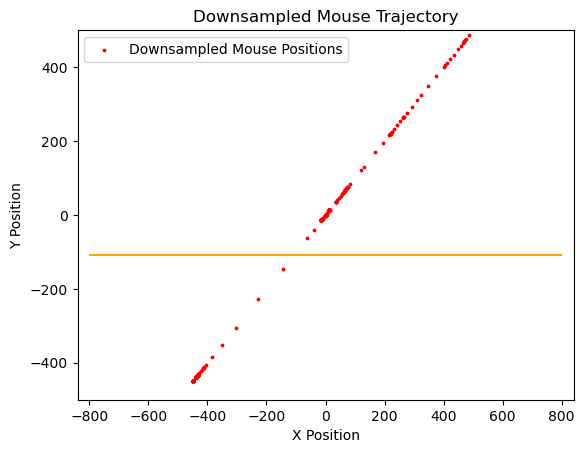

In [23]:
plt.scatter(downsampled_df['downsampled_coordinates'][0][, downsampled_df['downsampled_coordinates'][0], color='red', s=3, label='Downsampled Mouse Positions')
plt.hlines(-108, xmin=-800, xmax=800, colors='orange')

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Downsampled Mouse Trajectory')

# Set x-axis limits to show the left side of the screen
plt.xlim(-840, 840)
plt.ylim(-500, 500)  # Assuming max(downsampled_df['x']) is the rightmost position

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
plt.figure(figsize=(8, 6))
for i, row in downsampled_df.iterrows():
    x_coords, y_coords = zip(*row['downsampled_coordinates'])
    plt.plot(x_coords, y_coords, label=f'Trial {row["trial_id"]}', alpha=0.5)

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Downsampled Mouse Trajectories')

# Set x-axis limits to show the left side of the screen
plt.xlim(-840, 840)
plt.ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position

# Add legend
plt.legend()

# Show the plot
plt.show()

ValueError: Image size of 707x1166238 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

In [34]:
import pandas as pd

def resample_traj(data, rate):
    downsampled_coordinates = []

    for i in range(len(data)):
        c_traj = data['traj_record'].iloc[i]
        c_df = pd.DataFrame(c_traj, columns=['x', 'y'])
        c_df['timestamp'] = data['traj_timestamp'].iloc[i]
        c_df['timestamp'] = pd.to_datetime(c_df['timestamp'], unit='s')
        c_df.set_index('timestamp', inplace=True)

        downsampling_interval = rate
        down_df = c_df.resample(downsampling_interval).mean().dropna()

        # Append the downsampled coordinates as a tuple
        downsampled_coordinates.append(list(zip(down_df['x'], down_df['y'])))

    # Add a new column to the original DataFrame
    data['downsampled_coordinates'] = downsampled_coordinates

# Assuming df is your original DataFrame
resample_traj(df, '25L')

In [42]:
df = df.rename(columns = {'downsampled_coordinates':'down_traj'})

In [45]:
df = df[(df['block_number'] != 'Training')]
#df = df.reset_index()
#part below is necessary if you are reading it from csv or xlsx file not for pkl or json
"""
error_tri = []
for i in range(len(df)):
    try:
        df['traj_record'].iloc[i] = ast.literal_eval(df['traj_record'].iloc[i])
    except (ValueError, SyntaxError) as e:
        error_tri.append(i)
        print(f"Error at index {i}: {e}")
        continue
"""
# Now, 'traj_record' column contains lists of tuples
    
# Now, 'traj_record' column contains lists of tuples
df_blue = df[df['choice'] == 'Blue']
df_red = df[df['choice'] == 'Red']
#df_blue = df_blue.reset_index()
#df_red = df_red.reset_index()

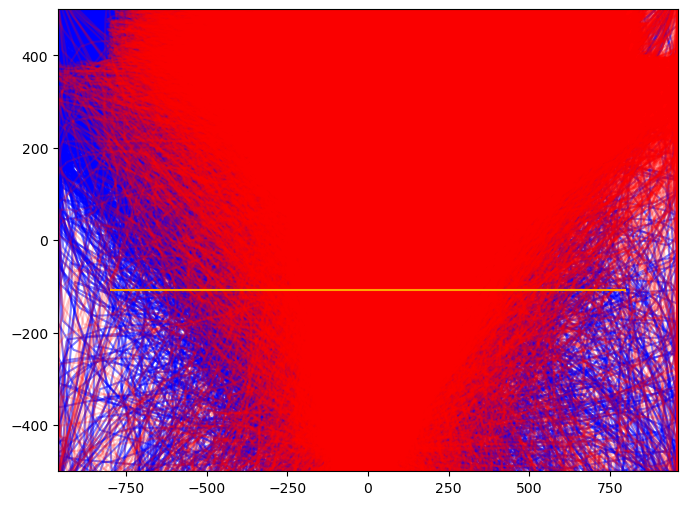

In [47]:

plt.figure(figsize=(8, 6))
for z in range(len(df_blue)):
#    if z == 88 or z == 99 or z == 127 or z == 195 or z == 210 or z == 247 or z == 279 or z ==339 or z == 457:
#        continue
    x_coords = [pos[0] for pos in df_blue['down_traj'].iloc[z]]
    y_coords = [pos[1] for pos in df_blue['down_traj'].iloc[z]]

    plt.plot(x_coords, y_coords, label='Mouse Trajectory', color='blue',alpha = 0.5)

for b in range(len(df_red)):
    x_red_coords = [pos[0] for pos in df_red['down_traj'].iloc[b]]
    y_red_coords = [pos[1] for pos in df_red['down_traj'].iloc[b]]
    
    # Create a new figure
   
    
    # Plot the mouse trajectory
   
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory', color='red', alpha = 0.2)
    #plt.scatter(x_coords, y_coords, color='red', s=4, label='Mouse Positions')
    
    
    # Add labels and title
    #plt.xlabel('X Position')
    #plt.ylabel('Y Position')
    #plt.title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    
plt.xlim(-960, 960)
plt.ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'orange')
# Add legend
#plt.legend()

# Show the plot
plt.show()


In [52]:
df['traj_timestamp'].iloc[0]

[12.5174017,
 12.5192998,
 12.5220723,
 12.5242995,
 12.5263486,
 12.5284862,
 12.5303311,
 12.5323634,
 12.5346149,
 12.536978,
 12.5390194,
 12.5422635,
 12.5442165,
 12.5472924,
 12.5492128,
 12.5512598,
 12.5532978,
 12.555222,
 12.5572111,
 12.559267,
 12.5612273,
 12.5632127,
 12.5652247,
 12.5670762,
 12.5684567,
 12.5702576,
 12.5722101,
 12.5742535,
 12.5762262,
 12.5782528,
 12.5802529,
 12.582212,
 12.5840591,
 12.5860394,
 12.5888835,
 12.5908306,
 12.5938658,
 12.5972781,
 12.6003051,
 12.6022451,
 12.6042992,
 12.6063002,
 12.6082138,
 12.6103117,
 12.6122121,
 12.6142267,
 12.6162618,
 12.6183322,
 12.6204176,
 12.6222171,
 12.6243914,
 12.6263407,
 12.6284715,
 12.6303652,
 12.6323423,
 12.6343619,
 12.6363681,
 12.6384341,
 12.6403692,
 12.6422157,
 12.6442671,
 12.646384,
 12.648392,
 12.6504285,
 12.6524045,
 12.6543971,
 12.6564704,
 12.6583317,
 12.6602577,
 12.6622778,
 12.6642645,
 12.6662617,
 12.6682631,
 12.6702755,
 12.6722532,
 12.6740549,
 12.6757705,
 12.6

In [49]:
df

,level_0,index,pt_num,Age,Gender,Handedness,trial_nbr,block_number,traj_record,traj_timestamp,...,rt,acc,choice,true_value,difficulty,c_value,trial_duration,Experiment Duration,previous_response,down_traj
0,0,40,10,18,Female,Right,1,Block 1,"[[0, -450], [0, -450], [0, -450], [0, -450], [...","[12.5174017, 12.5192998, 12.5220723, 12.524299...",...,0.723426,True,Red,Red,Hard,0.520,16.866942,274.629834,Red,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
1,1,41,10,18,Female,Right,2,Block 1,"[[0, -450], [0, -450], [0, -449], [0, -449], [...","[16.9838415, 16.9860737, 16.9893601, 16.991049...",...,0.601322,True,Blue,Blue,Hard,0.480,20.133971,277.896861,Red,"[(0.0, -449.0), (0.23076923076923078, -446.923..."
2,2,42,10,18,Female,Right,3,Block 1,"[[0, -450], [0, -450], [0, -450], [0, -450], [...","[20.2512517, 20.2527865, 20.2547759, 20.256771...",...,0.000000,NAN,NAN,Control,Control,0.500,22.217341,279.980231,Blue,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
3,3,43,10,18,Female,Right,4,Block 1,"[[21, -465], [21, -465], [21, -465], [27, -469...","[22.3345193, 22.3358312, 22.3377876, 22.341103...",...,0.961610,Control,Red,Control,Control,0.500,29.367526,287.130415,NAN,"[(25.375, -467.875), (38.0, -476.0), (54.45454..."
4,4,44,10,18,Female,Right,5,Block 1,"[[0, -450], [0, -450], [0, -450], [0, -450], [...","[29.4848586, 29.4864095, 29.48861, 29.4906918,...",...,0.779001,True,Blue,Blue,Easy,0.455,32.334250,290.097140,Red,"[(0.0, -450.0), (0.0, -450.0), (0.0, -450.0), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55675,55675,995,9,20,Female,Right,956,Block 10,"[[-2, -445], [-2, -445], [-2, -445], [-3, -442...","[2314.1136449, 2314.1151622, 2314.1171618, 231...",...,0.379939,True,Red,Red,Easy,0.545,2316.563312,2667.611143,Red,"[(-2.5, -443.5), (-3.9166666666666665, -438.83..."
55676,55676,996,9,20,Female,Right,957,Block 10,"[[0, -449], [0, -449], [0, -449], [0, -449], [...","[2316.6804314, 2316.682014, 2316.6840684, 2316...",...,0.543698,Control,Blue,Control,Control,0.500,2318.596553,2669.644384,Red,"[(0.0, -448.0), (-0.5, -443.4166666666667), (-..."
55677,55677,997,9,20,Female,Right,958,Block 10,"[[-5, -455], [-5, -455], [-5, -455], [-8, -458...","[2318.7138882, 2318.7153754, 2318.717575, 2318...",...,0.539592,Control,Blue,Control,Control,0.500,2320.630723,2671.678555,Blue,"[(-6.5, -456.5), (-15.583333333333334, -462.58..."
55678,55678,998,9,20,Female,Right,959,Block 10,"[[-4, -456], [-4, -456], [-7, -459], [-7, -459...","[2320.7471697, 2320.749239, 2320.7516965, 2320...",...,0.474139,True,Blue,Blue,Medium,0.470,2322.597500,2673.645328,Blue,"[(-4.0, -456.0), (-12.75, -464.5), (-34.0, -47..."
